<a href="https://colab.research.google.com/github/carolinatobias/InteligenciaArtificial/blob/main/PIAIA60.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PRODUCTO INTEGRADOR DE APRENDIZAJE

Carolina monserrat Tobía García 1806545 Carlos Iván Ortiz Galván 1849283 Oscar Daniel García Juárez 1844282 Fabiola Alejandra Fabela Alvarado 1846452 Sebastián Alejandro Solis Quiróz 1816855 Oscar Josemario Gamboa Ortega 1867917

Inteligencia Artificial Jueves N4

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import keras
from keras.datasets import cifar100
(train_images, train_labels), (test_images, test_labels) = datasets.cifar100.load_data(label_mode='coarse')
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(256, (3,3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(256, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(256, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(20))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 256)       7168      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 256)      0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 256)       590080    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 256)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 256)         590080    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 2, 2, 256)       

In [ ]:
model.compile(loss =tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='rmsprop', metrics=['accuracy'])

history=model.fit(train_images, train_labels, epochs=25, batch_size=250,
                  validation_data=(test_images, test_labels))

Epoch 1/25
200/200 [==============================] - 21s 94ms/step - loss: 1.0212 - accuracy: 0.6737 - val_loss: 1.3767 - val_accuracy: 0.5716
Epoch 2/25
200/200 [==============================] - 19s 94ms/step - loss: 0.9409 - accuracy: 0.6965 - val_loss: 1.4487 - val_accuracy: 0.5546
Epoch 3/25
200/200 [==============================] - 19s 93ms/step - loss: 0.9026 - accuracy: 0.7093 - val_loss: 1.3588 - val_accuracy: 0.5781
Epoch 4/25
200/200 [==============================] - 19s 94ms/step - loss: 0.8653 - accuracy: 0.7177 - val_loss: 1.3468 - val_accuracy: 0.5905
Epoch 5/25
200/200 [==============================] - 19s 93ms/step - loss: 0.8236 - accuracy: 0.7311 - val_loss: 1.3126 - val_accuracy: 0.6021
Epoch 6/25
200/200 [==============================] - 19s 93ms/step - loss: 0.7885 - accuracy: 0.7431 - val_loss: 1.3112 - val_accuracy: 0.6009
Epoch 7/25
200/200 [==============================] - 19s 94ms/step - loss: 0.7611 - accuracy: 0.7505 - val_loss: 1.3920 - val_accuracy:

313/313 - 3s - loss: 1.4999 - accuracy: 0.6016 - 3s/epoch - 8ms/step


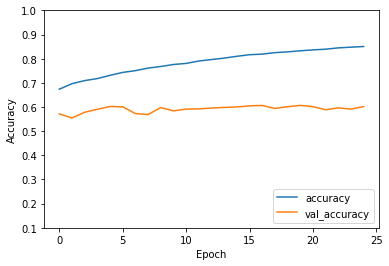

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.1, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc)

0.6015999913215637
